# Machine Learning Analysis in the Earth Systems Sciences


In this module, you are tasked with planning, implementing, and evaluating a machine learning solution for a real-world scenario. Given pre-configured code blocks and prepared data, you will create a problem statement, explore the data, experiment with model development, and ultimately make a recommendation on the utility of machine learning for your scenario.
To get started, first run the cell below to prepare this notebook. While that process runs, watch the following video to learn more about this scenario.

# Missing weather station in western North Carolina

Play the below video to learn about the situation.

`<video>`

`link to transcript`

## Part 1: Problem Framing

Based on the information provided in the video, which *type* of machine learning analysis is most appropriate for this scenario?

In [1]:
## hide this?
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
# HIDE THIS

classification_button = widgets.Button(
   description='Classification',
   layout=widgets.Layout(width='200px', margin='10px')
)

regression_button = widgets.Button(
   description='Regression',
   layout=widgets.Layout(width='200px', margin='10px')
)

def classification_clicked(b):
   clear_output(wait=True)
   display(buttons)
   print("Classification tasks work for scenarios\n"
         "that require classifying data into\n"
         "categories. This task needs a numerical\n"
         "value for output, and therefore requires\n"
         "a different approach.")
   
def regression_clicked(b):
   clear_output(wait=True)
   display(buttons)
   print("Correct, this scenario requires a\n"
         "numerical output, so we will use a\n"
         "regression algorithm for this scenario.")

classification_button.on_click(classification_clicked)
regression_button.on_click(regression_clicked)

buttons = widgets.HBox([classification_button, regression_button])
display(buttons)

Classification tasks work for scenarios
that require classifying data into
categories. This task needs a numerical
value for output, and therefore requires
a different approach.


As a part of the problem framing step, we must answer a series of questions to ensure we're creating the best solution for this scenario. 

***Does a simpler solution exist?***
> From the video, we know that you have already completed a preliminary analysis that averaged values from nearby stations to Mt Mitchell. While these results showed some skill, there is room for improvement. 

***Can machine learning requirements be met?***
> The NC ECONet data provider has decades of hourly data available from several weather stations. This is sufficient for your model. 

***Which scientific question should be answered?***
> You will answer this question in **Exercise 1** below. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 1</p>
    <p>In your <b>Machine Learning Model Handbook</b>, type the scientific question to be answered for this situation.</p>
    <p>GENERAL RUBRIC TBD</p>
</div>

## Part 2: Data Handling

### Part 2a: Locate Data of Interest

You will be using other stations in the <a href="https://econet.climate.ncsu.edu/" target="blank">NC ECONet</a> for this project. Your colleague is a <a href="https://www.mongodb.com/resources/basics/data-engineering#what-is-data-engineering" target="blank">data engineer</a> who has done much of the data preparation for you. They have prepared the following document to describe the nature of the dataset they are providing you for your model building work. 

<div class="alert alert-info" role="alert">

### Metadata Document for Western North Carolina Weather Station Data

#### General Information

Dataset Name: Western NC Weather Station Time-Series Data

Description: This dataset contains tabular time-series data collected from multiple weather stations in Western North Carolina. The data includes atmospheric and environmental variables recorded at hourly intervals.

Date Range: January 1, 2015, to December 16, 2024

Geographic Coverage: Western North Carolina 

Data Frequency: Hourly

Last Updated: Jan 1, 2025

#### Data Structure

File Format: .parquet

Number of Records: 69,760 per station per feature

Columns (Features) 

- observation_datetime: Date and time of observation in <UTC?>

Columns (features) per Station (XXXX):

- XXXX_airtemp_degF (°F): Air temperature measured at 2 meters above ground level
- XXXX_windspeed_mph (mph): Average wind speed during the hour at 10 meters above ground level
- XXXX_winddgust_mph (mph): Peak wind gust during the hour at 10 meters above ground level
- XXXX_rh_percent (%): Average Relative humidity
- XXXX_precip_in (in): Total precipitation accumulated in the hour

Stations:

- BEAR (Bearwallow Mountain)
- BURN (Burnsville Tower)
- FRYI (Frying Pan Mountain)
- JEFF (Mount Jefferson Tower)
- **MITC (Mount Mitchell State Park) - target station**
- NCAT (North Carolina A&T University Research Farm)
- SALI (Piedmont Research Station)
- SASS (Sassafrass Mountain)
- UNCA (University of North Carolina - Asheville Weather Tower)
- WINE (Wayah Bald Mountain)

<a href="https://econet.climate.ncsu.edu/" target="blank">More station info</a>

#### Data Quality

Missing Data: Timestamps with no recorded data are marked as <>. Other info about handling missing data...

Outlier Handling: outside range handling

#### Data Provenance

Source: North Carolina State Climate Office ECONet, <a href="https://econet.climate.ncsu.edu" target="blank">https://econet.climate.ncsu.edu/about/</a>

#### Data Transformations

Time Normalization: ?? do we need these

Aggregations: ?? do we need these
</div>

### Part 2b: Explore Data

While your data engineer colleague prepared the data for your model and created the metadata document, you will still need to familiarize yourself with the data before you use it as input to a machine learning algorithm. In this step, you will take a closer look at the potential features for your model with a few tables and plots. 

First, let's read the data into this workspace.

In [3]:
# Import the Python library that can interpret the data file
import pandas as pd

# Location of the data on the remote server
file_path = "processed_data/NC_processed_data_1_6.parquet"

# Read data into this workspace
df = pd.read_parquet(file_path) 

The ***target features*** (the features that we are trying to predict with the machine learning model) are temperature, relative humidity, wind speed, wind gust, and precipitation at the Mt. Mitchell station. All other features are possible ***input features*** to the model. 

Let's now explore just the target features at Mt. Mitchell. Select the environmental variable and plot type from the dropdowns, then select Plot to reveal the plot. 

In [6]:
# HIDE THIS
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Variable dropdown
var_dropdown = widgets.Dropdown(
    options=[
        ('Temperature (F)', 'MITC_airtemp_degF'),
        ('Average Wind Speed (mph)', 'MITC_windspeed_mph'),
        ('Wind Gust (mph)', 'MITC_windgust_mph'),
        ('Relative Humidity (%)', 'MITC_rh_percent'),
        ('Precipitation (in)', 'MITC_precip_in')
    ],
    description='Variable:',
    disabled=False
)

# Plot type dropdown
plot_dropdown = widgets.Dropdown(
    options=['Histogram', 'Time Series'],
    description='Plot type:',
    disabled=False
)

# Button for plotting
plot_button = widgets.Button(description="Plot")

# Output widget to render plots
output = widgets.Output()

# Display widgets and output
display(widgets.HTML(value="<h3>Mt. Mitchell</h3>"), var_dropdown, plot_dropdown, plot_button, output)

# Button click event handler
def on_plot_button_click(b):
    # Retrieve current selections
    var_value = var_dropdown.value
    var_label = var_dropdown.label

    # Clear previous output
    with output:
        clear_output(wait=True)  # Clear the previous plot

        # Generate the selected plot
        if plot_dropdown.value == 'Histogram':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.hist(df[var_dropdown.value], bins=30, color='skyblue', edgecolor='black')
            ax.set_title(f"Histogram of {var_dropdown.label} at Mt. Mitchell (MITC)", fontsize=14)
            ax.set_xlabel(var_dropdown.label)
            ax.set_ylabel("Number of records")
            plt.show()
        elif plot_dropdown.value == 'Time Series':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.plot(df['observation_datetime'][::100], df[var_dropdown.value][::100], label=var_dropdown.label, color='orange')
            ax.set_title(f"Time Series of {var_dropdown.label} at Mt. Mitchell (MITC)", fontsize=14)
            ax.set_xlabel("Date")
            ax.set_ylabel(var_dropdown.label)
            plt.show()

# Attach the event handler to the button
plot_button.on_click(on_plot_button_click)

HTML(value='<h3>Mt. Mitchell</h3>')

Dropdown(description='Variable:', options=(('Temperature (F)', 'MITC_airtemp_degF'), ('Average Wind Speed (mph…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(description='Plot', style=ButtonStyle())

Output()

Now explore the ***input features***. Below is a map of where the stations are located in relation to MITC. 

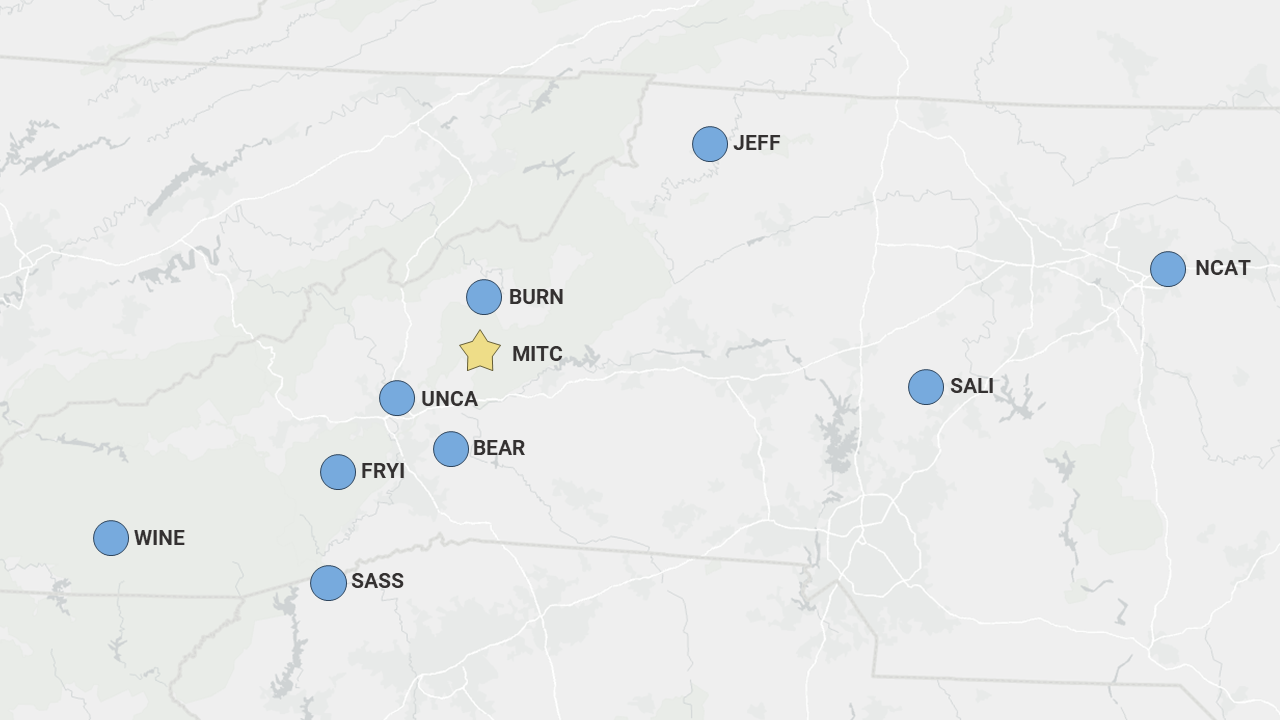

First select a station, variable, and type of plot, then select Plot to reveal the plot. 

To copy an image for pasting into your handbook, hold shift and right click on the image, then select Copy.

In [7]:
# HIDE THIS
var_dropdown = widgets.Dropdown(
    options=[
        ('Temperature (F)', 'airtemp_degF'),
        ('Average Wind Speed (mph)', 'windspeed_mph'),
        ('Wind Gust (mph)', 'windgust_mph'),
        ('Relative Humidity (%)', 'rh_percent'),
        ('Precipitation (in)', 'precip_in')
    ],
    description='Variable:',
    disabled=False
)

# Plot type dropdown
plot_dropdown = widgets.Dropdown(
    options=['Histogram', 'Time Series'],
    description='Plot type:',
    disabled=False
)

# Station dropdown
station_dropdown = widgets.Dropdown(
    options=['BEAR', 'BURN', 'FRYI', 'JEFF', 'NCAT', 'SALI', 'SASS', 'UNCA', 'WINE'],
    description='Station:',
    disabled=False
)

# Button for plotting
plot_button = widgets.Button(description="Plot")

# Output widget to render plots
output = widgets.Output()

# Display widgets and output
display(widgets.HTML(value="<h3>Input Stations</h3>"), station_dropdown, var_dropdown, plot_dropdown, plot_button, output)

# Button click event handler
def on_plot_button_click(b):
    # Retrieve current selection
    selected_var = f"{station_dropdown.value}_{var_dropdown.value}"

    # Clear previous output
    with output:
        clear_output(wait=True)  # Clear the previous plot

        # Generate the selected plot
        if plot_dropdown.value == 'Histogram':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.hist(df[selected_var], bins=30, color='skyblue', edgecolor='black')
            ax.set_title(f"Histogram of {var_dropdown.label} at {station_dropdown.value}", fontsize=14)
            ax.set_xlabel(var_dropdown.label)
            ax.set_ylabel("Number of records")
            plt.show()
        elif plot_dropdown.value == 'Time Series':
            fig, ax = plt.subplots(1, 1, tight_layout=True)
            ax.plot(df['observation_datetime'][::100], df[selected_var][::100], label=var_dropdown.label, color='orange')
            ax.set_title(f"Time Series of {var_dropdown.label} at {station_dropdown.value}", fontsize=14)
            ax.set_xlabel("Date")
            ax.set_ylabel(var_dropdown.label)
            plt.show()

# Attach the event handler to the button
plot_button.on_click(on_plot_button_click)


HTML(value='<h3>Input Stations</h3>')

Dropdown(description='Station:', options=('BEAR', 'BURN', 'FRYI', 'JEFF', 'NCAT', 'SALI', 'SASS', 'UNCA', 'WIN…

Dropdown(description='Variable:', options=(('Temperature (F)', 'airtemp_degF'), ('Average Wind Speed (mph)', '…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(description='Plot', style=ButtonStyle())

Output()

# Insert Pair Plots here?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2b</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>Do variables follow diurnal or annual patterns generally as expected?</li>
        <li>Do the variables have the expected ranges of values? Do any variables appear to include major outliers?</li>
        <li>Are there any features in any stations that look incorrect?</li>
        <li>Which stations appear to be most correlated to the variables at Mt Mitchell?</li>
        <li>Include any important plots. <i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. In this model, the data will be randomly split into these groups, but you decide the proportions of data for each group. Input your percentages in the blanks below, ensuring all percentages equal 100%.

In [8]:
# HIDE THIS
def create_percentage_widget():
    # Create text widgets for percentages
    training = widgets.BoundedIntText(
        value=0,
        min=0,
        max=100,
        description='Training %:',
        layout=widgets.Layout(width='200px')
    )
    
    testing = widgets.BoundedIntText(
        value=0,
        min=0,
        max=100,
        description='Testing %:',
        layout=widgets.Layout(width='200px')
    )
    
    validation = widgets.BoundedIntText(
        value=0,
        min=0,
        max=100,
        description='Validation %:',
        layout=widgets.Layout(width='200px')
    )
    
    output = widgets.Output()
    
    def check_percentages(change):
        with output:
            output.clear_output()
            total = training.value + testing.value + validation.value
      
            print(f"\nTotal: {total}%")
            
            if total == 100:
                print("✓ Perfect! Percentages sum to 100%")
            else:
                print(f"✗ Warning: Percentages sum to {total}%, not 100%")
    
    # Add observers
    training.observe(check_percentages, names='value')
    testing.observe(check_percentages, names='value')
    validation.observe(check_percentages, names='value')
    
    # Layout
    widget_box = widgets.VBox([
        widgets.HTML(value="<h3>Dataset Split Percentages</h3>"),
        training,
        testing,
        validation,
        output
    ])
    
    display(widget_box)
    
    # Return both the widget box and a function to get decimal values
    def get_decimal_values():
        return {
            'training': training.value / 100,
            'testing': testing.value / 100,
            'validation': validation.value / 100
        }
    
    return widget_box, get_decimal_values

widget, get_values = create_percentage_widget()

In [9]:
# HIDE THIS
decimals = get_values()
training = decimals['training']    # 0.7 for 70%
testing = decimals['testing']      # 0.2 for 20%
validation = decimals['validation'] # 0.1 for 10%

In [10]:
# HIDE THIS
def split_data_temporal(df, final_cutoff='2024-09-28', train_pct=0.6, test_pct=0.2, val_pct=0.2):
    """
    Split data into training, testing, validation, and true test sets based on dates
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame with a 'date' column
    final_cutoff : str
        Date string for the cutoff between validation and true test sets
    train_pct : float
        Percentage of pre-cutoff data to use for training (default: 0.6)
    test_pct : float
        Percentage of pre-cutoff data to use for testing (default: 0.2)
    val_pct : float
        Percentage of pre-cutoff data to use for validation (default: 0.2)
    """
    # Input validation
    if not abs(train_pct + test_pct + val_pct - 1.0) < 1e-10:
        raise ValueError("Training, testing, and validation percentages must sum to 1.0")
    
    # Convert dates to pandas datetime
    final_cutoff = pd.to_datetime(final_cutoff)
    
    # Create mask for true test set
    true_test_mask = df['date'] > final_cutoff
    
    # Get the remaining data (everything up to final_cutoff)
    remaining_data = df[~true_test_mask].copy()
    remaining_data = remaining_data.sort_values('date')
    
    # Calculate the split points based on percentages
    n_samples = len(remaining_data)
    train_end_idx = int(n_samples * train_pct)
    test_end_idx = int(n_samples * (train_pct + test_pct))
    
    # Get the dates at these split points
    train_cutoff = remaining_data.iloc[train_end_idx]['date']
    test_cutoff = remaining_data.iloc[test_end_idx]['date']
    
    # Create masks for each period
    validation_mask = (df['date'] <= final_cutoff) & (df['date'] > test_cutoff)
    test_mask = (df['date'] <= test_cutoff) & (df['date'] > train_cutoff)
    train_mask = df['date'] <= train_cutoff
    
    # Split the data
    # Exclude observation_datetime, year_index, and date from features
    X_cols = [col for col in df.columns 
              if 'MITC' not in col 
              and col not in ['observation_datetime', 'year_index', 'date']]
    y_cols = [col for col in df.columns if 'MITC' in col]
    
    # Create the splits
    X_train = df.loc[train_mask, X_cols]
    y_train = df.loc[train_mask, y_cols]
    
    X_test = df.loc[test_mask, X_cols]
    y_test = df.loc[test_mask, y_cols]
    
    X_val = df.loc[validation_mask, X_cols]
    y_val = df.loc[validation_mask, y_cols]
    
    X_true_test = df.loc[true_test_mask, X_cols]
    y_true_test = df.loc[true_test_mask, y_cols]
    
    # Print summary statistics
    print("Data split summary:")
    print(f"Training period: {df.loc[train_mask, 'date'].min()} to {df.loc[train_mask, 'date'].max()}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(remaining_data):.1%} of pre-cutoff data)")
    
    print(f"\nTesting period: {df.loc[test_mask, 'date'].min()} to {df.loc[test_mask, 'date'].max()}")
    print(f"Testing samples: {len(X_test)} ({len(X_test)/len(remaining_data):.1%} of pre-cutoff data)")
    
    print(f"\nValidation period: {df.loc[validation_mask, 'date'].min()} to {df.loc[validation_mask, 'date'].max()}")
    print(f"Validation samples: {len(X_val)} ({len(X_val)/len(remaining_data):.1%} of pre-cutoff data)")
    
    print(f"\nTrue test period: {df.loc[true_test_mask, 'date'].min()} to {df.loc[true_test_mask, 'date'].max()}")
    print(f"True test samples: {len(X_true_test)}")
    
    print("\nFeatures used:")
    print(X_cols)
    
    return (X_train, y_train, X_test, y_test, X_val, y_val, X_true_test, y_true_test)

In [11]:
# HIDE THIS
# Use the function
X_train, y_train, X_test, y_test, X_val, y_val, X_true_test, y_true_test = split_data_temporal(df, 
                                                                                               train_pct=training, 
                                                                                               test_pct=testing, 
                                                                                               val_pct=validation)

Data split summary:
Training period: 2017-01-01 00:00:00 to 2023-12-20 08:00:00
Training samples: 61057 (90.0% of pre-cutoff data)

Testing period: 2023-12-20 09:00:00 to 2024-05-09 16:00:00
Testing samples: 3392 (5.0% of pre-cutoff data)

Validation period: 2024-05-09 17:00:00 to 2024-09-28 00:00:00
Validation samples: 3392 (5.0% of pre-cutoff data)

True test period: 2024-09-28 01:00:00 to 2024-12-16 23:00:00
True test samples: 1919

Features used:
['BURN_airtemp_degF', 'BURN_windspeed_mph', 'BURN_windgust_mph', 'BURN_rh_percent', 'BURN_precip_in', 'day_index', 'hour_index', 'NCAT_airtemp_degF', 'NCAT_windspeed_mph', 'NCAT_windgust_mph', 'NCAT_rh_percent', 'NCAT_precip_in', 'SALI_airtemp_degF', 'SALI_windspeed_mph', 'SALI_windgust_mph', 'SALI_rh_percent', 'SALI_precip_in', 'SASS_airtemp_degF', 'SASS_windspeed_mph', 'SASS_windgust_mph', 'SASS_rh_percent', 'SASS_precip_in', 'FRYI_airtemp_degF', 'FRYI_windspeed_mph', 'FRYI_windgust_mph', 'FRYI_rh_percent', 'FRYI_precip_in', 'JEFF_airtem

## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining your machine learning model. You will start with an initial model, and keep track of your subsequent trials in your Machine Learning Model Handbook. 
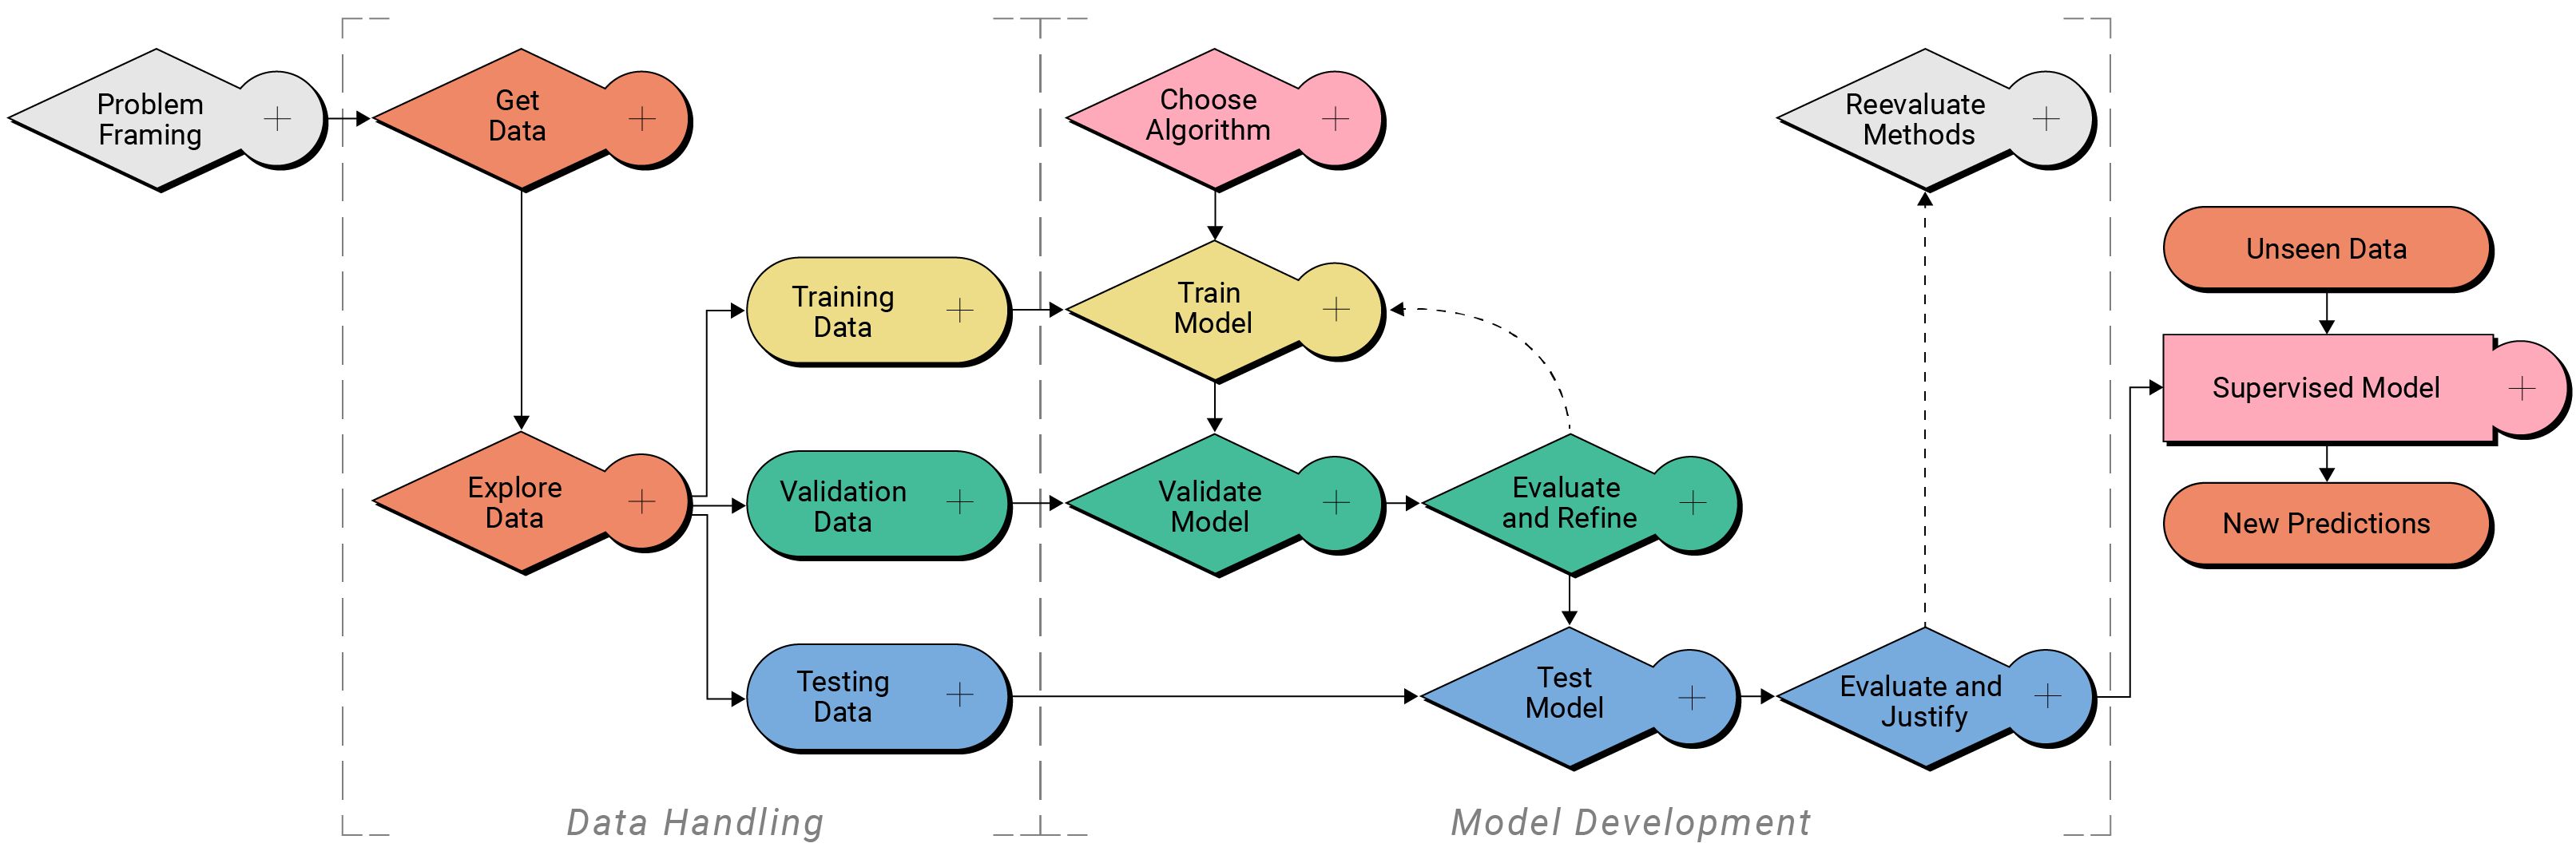

### Part 3a: Choose Algorithm
First, you will choose an algorithm to train. You have two options: the *XGBR Regressor* and the *MultiLinearRegressor*. Both have pros and cons for this task. Choose one for your initial model, but you may choose to test the other algorithm in subsequent trials. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Algorithms</p>
    <p class="admonition-title" style="font-weight:bold">XGBR Regressor</p>
    - What this algo is good for<br>
    - What downsides it has<br><br>
    <p class="admonition-title" style="font-weight:bold">MultiLinearRegressor</p>
    - What this algo is good for<br>
    - What downsides it has
</div>

In [12]:
# HIDE THIS
from xgboost import XGBRegressor
import time 
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [13]:
# HIDE THIS
class MultiXGBRegressor(MultiOutputRegressor):
    def __init__(self, estimator):
        super().__init__(estimator)
        self.estimators_ = []

    def fit(self, X, y):
        start_time = time.time()
        print("\nStarting Multi-Target XGBoost Training Process...")
        y_np = y.values if hasattr(y, 'values') else np.array(y)
        n_outputs = y_np.shape[1]
        target_names = y.columns if hasattr(y, 'columns') else [f"target_{i}" for i in range(n_outputs)]
        
        self.estimators_ = [
            XGBRegressor(**{k: v for k, v in self.estimator.get_params().items() 
                          if k != 'verbose'}) 
            for _ in range(n_outputs)
        ]
        
        for i, (est, target) in enumerate(zip(self.estimators_, target_names)):
            target_start = time.time()
            print(f"\nTraining target {i+1}/{n_outputs}: {target}", flush=True)
            est.fit(X, y_np[:, i], verbose=False)
            target_time = time.time() - target_start
            print(f"Target completed in {target_time:.2f} seconds", flush=True)

        total_time = time.time() - start_time
        print(f"\nTotal training completed in {total_time:.2f} seconds")
        return self


In [14]:
# HIDE THIS
class MultiLinearRegressor(MultiOutputRegressor):
    def __init__(self):
        super().__init__(LinearRegression())
        self.estimators_ = []

    def fit(self, X, y):
        start_time = time.time()
        print("\nStarting Multi-Target Linear Regression Training...")
        y_np = y.values if hasattr(y, 'values') else np.array(y)
        n_outputs = y_np.shape[1]
        target_names = y.columns if hasattr(y, 'columns') else [f"target_{i}" for i in range(n_outputs)]
        
        self.estimators_ = [LinearRegression() for _ in range(n_outputs)]
        
        for i, (est, target) in enumerate(zip(self.estimators_, target_names)):
            target_start = time.time()
            print(f"\nTraining target {i+1}/{n_outputs}: {target}", flush=True)
            est.fit(X, y_np[:, i])
            target_time = time.time() - target_start
            print(f"Target completed in {target_time:.2f} seconds", flush=True)

        total_time = time.time() - start_time
        print(f"\nTotal training completed in {total_time:.2f} seconds")
        return self

# Need a method to select the algo here

### Part 3b: Choose input features

Given your data exploration, you must now choose the stations to use as input features. You may choose as many input stations as you'd like, however, recall that more stations does not always create a better model. Think strategically based on your evidence. 

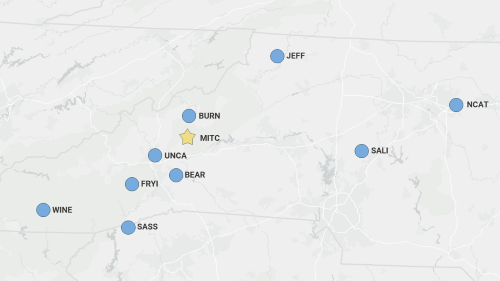

In [15]:
# HIDE THIS
def create_station_selector():
    # List of all stations
    stations = ['BURN', 'NCAT', 'SALI', 'SASS', 'FRYI', 'JEFF', 'BEAR', 'WINE', 'UNCA']
    
    # Create checkbox widgets for each station
    checkboxes = {
        station: widgets.Checkbox(
            value=False,
            description=station,
            disabled=False,
            indent=False
        ) for station in stations
    }
    
    # Create a container for all checkboxes
    checkbox_grid = widgets.GridBox(
        children=[checkboxes[station] for station in stations],
        layout=widgets.Layout(
            grid_template_columns='repeat(3, auto)',
            grid_gap='10px'
        )
    )
    
    # Function to get selected stations
    def get_selected_stations():
        return [station for station, checkbox in checkboxes.items() if checkbox.value]
    
    # Create an output widget to display selected stations
    output = widgets.Output()
    
    # Update function for when checkboxes change
    def on_change(change):
        with output:
            output.clear_output()
            selected = get_selected_stations()
            print(f"Selected stations: {', '.join(selected) if selected else 'None'}")
    
    # Add observers to all checkboxes
    for checkbox in checkboxes.values():
        checkbox.observe(on_change, names='value')
    
    # Display everything
    display(widgets.VBox([
        widgets.HTML(value="<h3>Select Weather Stations</h3>"),
        checkbox_grid,
        output
    ]))
    
    return checkboxes

In [16]:
station_selector = create_station_selector()

In [24]:
# HIDE THIS
# To get selected stations at any time:
def get_selected_stations(selector):
    return [station for station, checkbox in selector.items() if checkbox.value]

selected = get_selected_stations(station_selector)
selected 

['BURN', 'FRYI', 'JEFF', 'WINE', 'UNCA']

In [25]:
# HIDE THIS
def filter_dataframe(df, prefix_values):
    """
    Filter DataFrame to keep only columns with specified prefixes plus day_index and hour_index.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    prefix_values (list): List of prefix values to match
    
    Returns:
    pandas.DataFrame: Filtered DataFrame with only the specified columns
    """
    # Print original column count
    print(f"Original DataFrame: {len(df.columns)} columns")
    
    # Start with day_index and hour_index
    columns_to_keep = ['day_index', 'hour_index']
    
    # Add any column that starts with our prefix values
    for prefix in prefix_values:
        matching_columns = [col for col in df.columns if col.startswith(prefix)]
        columns_to_keep.extend(matching_columns)
    
    # Create filtered dataframe
    filtered_df = df[columns_to_keep]
    
    # Print new column count
    print(f"Filtered DataFrame: {len(filtered_df.columns)} columns")
    
    return filtered_df

In [26]:
# HIDE THIS
X_train_filtered = filter_dataframe(X_train, selected)
X_val_filtered = filter_dataframe(X_val, selected)
X_test_filtered = filter_dataframe(X_test, selected)
X_true_test_filtered = filter_dataframe(X_true_test, selected)

Original DataFrame: 47 columns
Filtered DataFrame: 27 columns
Original DataFrame: 47 columns
Filtered DataFrame: 27 columns
Original DataFrame: 47 columns
Filtered DataFrame: 27 columns
Original DataFrame: 47 columns
Filtered DataFrame: 27 columns


### Part 3c: Train the Model

# Need to reorganize this code to follow the framework. Choose algo > Select stations > Train > Validate

In [27]:
# HIDE THIS
def create_model_buttons():
    # Create output widget for displaying results
    output = widgets.Output()
    
    # Create the buttons
    xgb_button = widgets.Button(
        description='Run XGBoost',
        layout=widgets.Layout(width='200px')
    )
    
    lr_button = widgets.Button(
        description='Run Linear Regression',
        layout=widgets.Layout(width='200px')
    )

    # Define button click handlers
    def run_xgboost(b):
        with output:
            clear_output()
            print("Running XGBoost model...")
            base_model = XGBRegressor(
                n_estimators=100,
                tree_method='hist',
                random_state=42
            )
            model = MultiXGBRegressor(base_model)
            model.fit(X_train_filtered, y_train)
            print("XGBoost model training completed!")
    
    def run_linear_regression(b):
        with output:
            clear_output()
            print("Running Linear Regression model...")
            model = MultiLinearRegressor()
            model.fit(X_train_filtered, y_train)
            print("Linear Regression training completed!")
    
    # Attach handlers to buttons
    xgb_button.on_click(run_xgboost)
    lr_button.on_click(run_linear_regression)
    
    # Create horizontal button layout
    button_box = widgets.HBox([xgb_button, lr_button])
    
    # Display buttons and output
    display(button_box)
    display(output)


In [30]:
selected_model = None

def create_model_buttons():
   # Global variable for model access
   global selected_model
   output = widgets.Output()
   
   xgb_button = widgets.Button(
       description='Run XGBoost',
       layout=widgets.Layout(width='200px')
   )
   
   lr_button = widgets.Button(
       description='Run Linear Regression', 
       layout=widgets.Layout(width='200px')
   )

   def run_xgboost(b):
       global selected_model
       with output:
           clear_output()
           print("Running XGBoost model...")
           base_model = XGBRegressor(
               n_estimators=100,
               tree_method='hist',
               random_state=42
           )
           selected_model = MultiXGBRegressor(base_model)
           selected_model.fit(X_train_filtered, y_train)
           print("XGBoost model training completed!")
   
   def run_linear_regression(b):
       global selected_model
       with output:
           clear_output()
           print("Running Linear Regression model...")
           selected_model = MultiLinearRegressor()
           selected_model.fit(X_train_filtered, y_train)
           print("Linear Regression training completed!")
   
   xgb_button.on_click(run_xgboost)
   lr_button.on_click(run_linear_regression)
   
   button_box = widgets.HBox([xgb_button, lr_button])
   display(button_box)
   display(output)
   
   return selected_model

In [31]:
# Will delete
create_model_buttons()

Output()

### Part 3c: Validate the Model

Kick off validation and print out copy pastable results (printout should include inputs). Paste the results in your handbook.

In [32]:
# HIDE THIS
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

In [33]:
# HIDE THIS
# Make predictions
y_pred = selected_model.predict(X_test_filtered)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("\nRoot Mean Squared Error for each target:")
for target, error in zip(y_test.columns, rmse):
    print(f"{target}: {error:.4f}")

print("\nR2 Score for each target:")
for target, score in zip(y_test.columns, r2):
    print(f"{target}: {score:.4f}")

# Overall performance
print(f"Average RMSE: {np.mean(rmse):.2f}")
print(f"Average R2 Score: {np.mean(r2):.2f}")


Root Mean Squared Error for each target:
MITC_airtemp_degF: 4.0761
MITC_windspeed_mph: 8.1683
MITC_windgust_mph: 8.1198
MITC_rh_percent: 24.5320
MITC_precip_in: 0.0402

R2 Score for each target:
MITC_airtemp_degF: 0.8857
MITC_windspeed_mph: -0.7398
MITC_windgust_mph: 0.4300
MITC_rh_percent: -0.7538
MITC_precip_in: -0.0599
Average RMSE: 8.99
Average R2 Score: -0.05


### Part 3d: Evaluate and Refine the Model

Examine the results of the model validation. What do each mean? Could they be improved? Review the descriptions of the evaluation metrics, then complete the next exercise. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Evaluation Metrics</p>
    <p class="admonition-title" style="font-weight:bold">R²</p>
    - A measure of how well the model explains the variation in the dataset<br>
    - A standardized scale (0-1) for comparing models across different trials<br>
    - The closer to 1, the better the model accuracy<br>
    - Assumes that the input data have a linear relationship<br>
    - Only measures correlation among data, cannot distinguish good and bad predictions<br><br>
    <p class="admonition-title" style="font-weight:bold">Root Mean Square Error</p>
    - A measure of how large a typical prediction error is<br>
    - Reports error in the original units (degrees, %, mph, etc)<br>
    - Better reflects the accuracy of predictions in real-world situations<br>
    - Dependent on the scale of the dataset, making comparisons among datasets more difficult
</div>


<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3d</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe the results of your initial model validation. Include the following:
    <ul>
        <li>How do you interpret these results in the context of the real-world situation?</li>
        <li>Potentially how could these metrics be improved in your next iteration? Why?</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

### Part 3e: Iterative Testing

Your first trial is complete! Now you'll create new trials to improve the evaluation metrics from the validation phase. Here's how:

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <ol>
        <li>Return to <a href ="#Part-3a:-Choose-Algorithm">Part 3a: Choose-Algorithm</a> and choose to either change or keep your algorithm</li>
        <li>Proceed to Part 3b to choose new stations, or keep the stations you already have</li>
        <li>Re-train your model</li>
        <li>Re-validate your model and review the evaluation metrics</li>
        <li>Paste the results of each trial in your Machine Learning Model Handbook</li>
        <li>Repeat this process until you have metrics you are satisfied with, and move on to the next part below</li>
    </ol>
</div>

### Part 3f: Test Model
Now your model has been trained and validated with the best results. Next, it's time to test the model on brand new data, the testing dataset. Execute the cell below to test the model with these independent data points. 

In [34]:
# HIDE THIS
# Make predictions
y_pred = selected_model.predict(X_val_filtered)

# Evaluate the model
rmse = root_mean_squared_error(y_val, y_pred, multioutput='raw_values')
r2 = r2_score(y_val, y_pred, multioutput='raw_values')

print("\nRoot Mean Squared Error for each target:")
for target, error in zip(y_val.columns, rmse):
    print(f"{target}: {error:.4f}")

print("\nR2 Score for each target:")
for target, score in zip(y_val.columns, r2):
    print(f"{target}: {score:.4f}")

# Overall performance
print(f"Average RMSE: {np.mean(rmse):.2f}")
print(f"Average R2 Score: {np.mean(r2):.2f}")


Root Mean Squared Error for each target:
MITC_airtemp_degF: 3.1679
MITC_windspeed_mph: 4.9161
MITC_windgust_mph: 6.2175
MITC_rh_percent: 9.6482
MITC_precip_in: 0.0658

R2 Score for each target:
MITC_airtemp_degF: 0.7432
MITC_windspeed_mph: 0.5325
MITC_windgust_mph: 0.5161
MITC_rh_percent: 0.3630
MITC_precip_in: 0.4782
Average RMSE: 4.80
Average R2 Score: 0.53


### Part 3g: Evaluate and Justify
How do these metrics compare to your validation results?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3g</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe how your testing metrics compare to your validation metrics. Include the following:
    <ul>
        <li>Did the metrics get better or worse?</li>
        <li>Is this model ready for production deployment? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

## Part 4: How did you do?
With your model complete, you can now plot the predicted output and see the backfilled data at Mt. Mitchell. 

In [35]:
# HIDE THIS
# Make predictions
y_pred = selected_model.predict(X_true_test_filtered)
y_pred.shape

(1919, 5)

In [36]:
# HIDE THIS
y_val.columns

Index(['MITC_airtemp_degF', 'MITC_windspeed_mph', 'MITC_windgust_mph',
       'MITC_rh_percent', 'MITC_precip_in'],
      dtype='object')

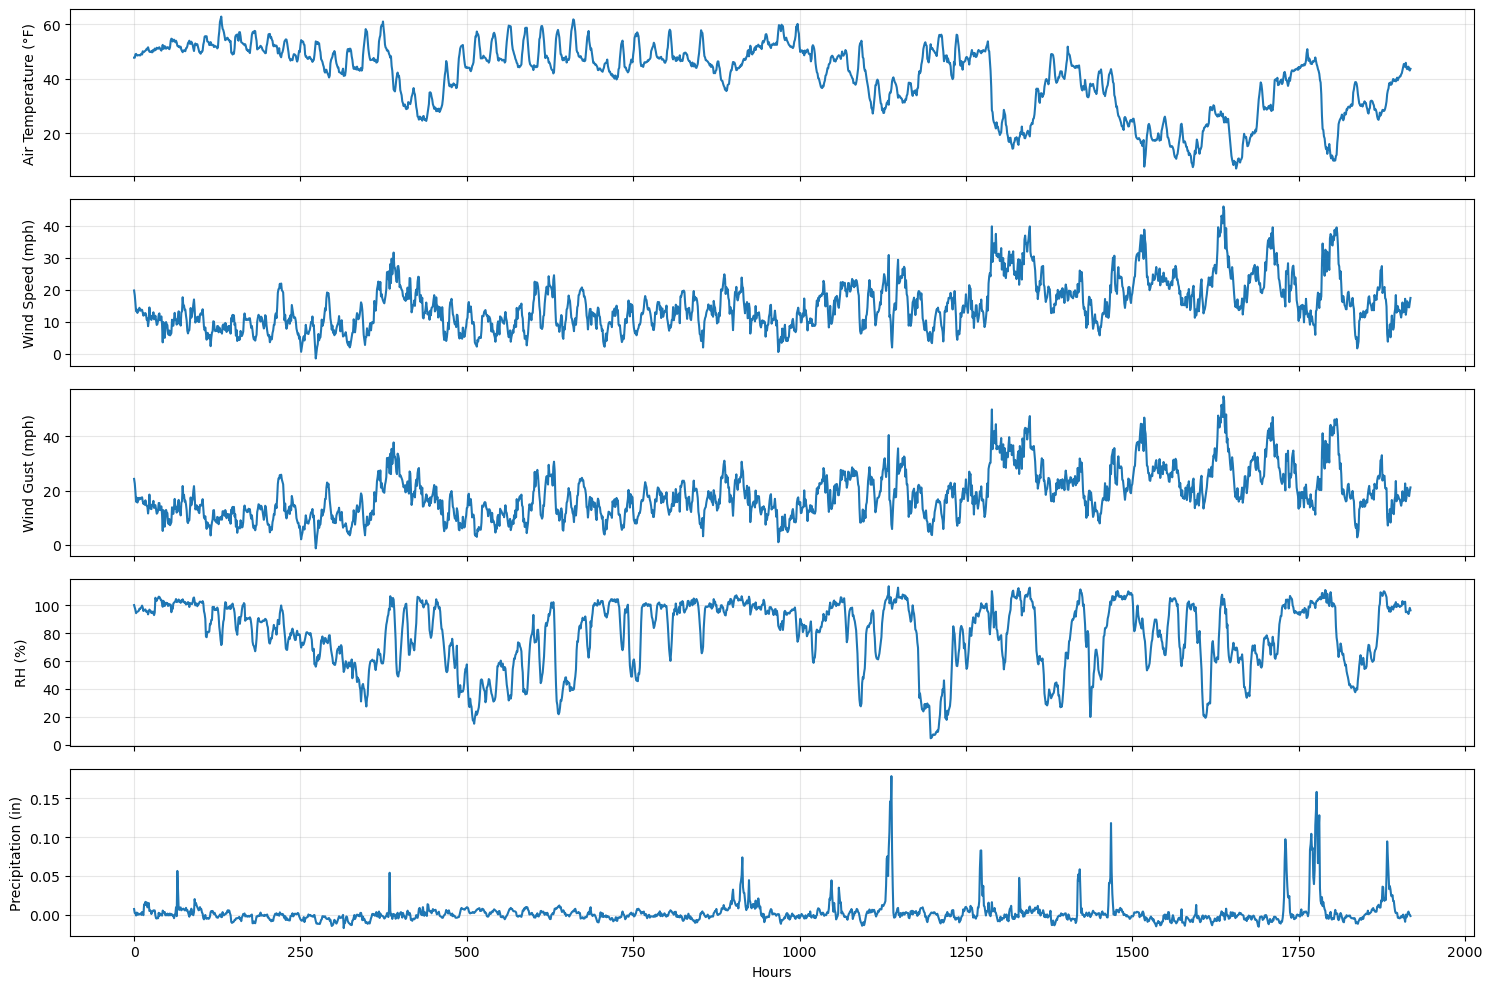

In [37]:
# HIDE THIS
fig, axs = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
labels = ['Air Temperature (°F)', 'Wind Speed (mph)', 'Wind Gust (mph)', 'RH (%)', 'Precipitation (in)']
for i, (ax, label) in enumerate(zip(axs, labels)):
    ax.plot(y_pred[:, i])
    ax.set_ylabel(label)
    ax.grid(True, alpha=0.3)
axs[-1].set_xlabel('Hours')
plt.tight_layout()
plt.show()